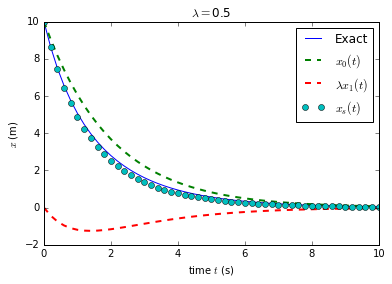

In [1]:
###Exemple 1 de wikipedia francais sur perturbation theory

##Solution of dx/dt + 1/tau*x + (lambda/(tau*L0))*x**2 = 0

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tab_t = np.linspace(0.,10, 51)

X0 = 10. ####initial condition
tau = 2.
L0=10.
l = 0.5 ####parametre de developpement perturbatif (lambda)

tab_exact = X0*np.exp(-tab_t/tau)/(1+l*X0*(1.-np.exp(-tab_t/tau))/L0)
tab_x0 = X0*np.exp(-tab_t/tau)  ##Solution exacte sans terme en x**2
tab_lx1 = (l*X0**2/L0)*np.exp(-2.*tab_t/tau) - (l*X0**2)/L0*np.exp(-tab_t/tau) ##Correction au premier ordre en lambda
tab_xs = tab_x0 + tab_lx1

plt.plot(tab_t, tab_exact, label = 'Exact' )
plt.plot(tab_t, tab_x0, '--', linewidth=2, label=r'$x_0(t)$')
plt.plot(tab_t, tab_lx1, '--', linewidth=2,label= r'$\lambda x_1(t)$')
plt.xlabel(r'time $t$ (s)')
plt.ylabel(r'$x$ (m)')
plt.plot(tab_t, tab_xs, 'o', label = r'$x_s(t)$')
plt.title(r'$\lambda=$'+str(l))
plt.legend()
plt.savefig('PT_lambda='+str(l)+'.pdf')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


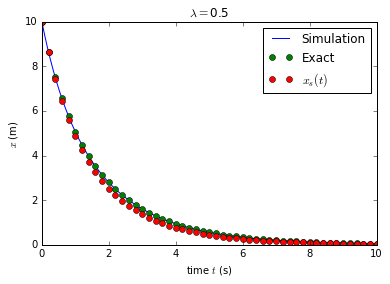

In [2]:
####Do the simulation of the equation

Delta_t = 0.001
NB_t = 10./Delta_t + 1
tab_simu_t = np.linspace(0,10., NB_t)

tab_x = np.zeros(NB_t)


for i in range(len(tab_simu_t)):
    if i == 0: 
        tab_x[i]=X0
        continue
    Delta_x = -(tab_x[i-1]/tau + l/(tau*L0) * tab_x[i-1]**2)*Delta_t
    tab_x[i] = tab_x[i-1] + Delta_x

plt.plot(tab_simu_t, tab_x, label='Simulation')
plt.plot(tab_t, tab_exact, 'o', label = 'Exact' )
plt.plot(tab_t, tab_xs, 'o', label = r'$x_s(t)$')
plt.title(r'$\lambda=$'+str(l))
plt.xlabel(r'time $t$ (s)')
plt.ylabel(r'$x$ (m)')
plt.legend()
plt.savefig('Simus_lambda='+str(l)+'.pdf')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


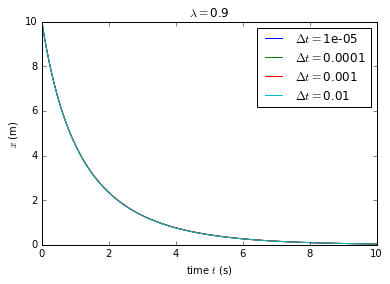

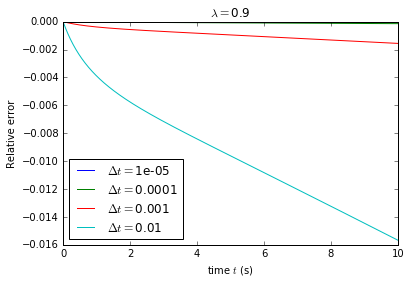

In [31]:
####Do the simulation of the equation with error budget

tab_delta_t = [0.00001, 0.0001, 0.001, 0.01]
#tab_delta_t = [0.001, 0.01, 0.1, 0.2, 0.5]
##generate the t values for the biggest delta_t to compare all of them 
Delta_t = np.max(tab_delta_t)
NB_t_comp = 10./Delta_t + 1
tab_t_comp = np.linspace(0,10., NB_t_comp)
tab_x_comp = np.zeros( (len(tab_delta_t),NB_t_comp) )

for k in range(len(tab_delta_t)):
    Delta_t = tab_delta_t[k]
    NB_t = 10./Delta_t + 1
    tab_simu_t = np.linspace(0,10., NB_t)

    tab_x = np.zeros(NB_t)


    for i in range(len(tab_simu_t)):
        if i == 0: 
            tab_x[i]=X0
            continue
        Delta_x = -(tab_x[i-1]/tau + l/(tau*L0) * tab_x[i-1]**2)*Delta_t
        tab_x[i] = tab_x[i-1] + Delta_x
    ##range the values for comparison
    for j in range(len(tab_t_comp)):
        index = np.argmin(np.abs(tab_simu_t - tab_t_comp[j]))
        tab_x_comp[k,j] = tab_x[index]
        

    plt.plot(tab_t_comp, tab_x_comp[k,:], label=r'$\Delta t=$'+str(Delta_t))
    
plt.title(r'$\lambda=$'+str(l))
plt.xlabel(r'time $t$ (s)')
plt.ylabel(r'$x$ (m)')
plt.legend()
plt.show()


for k in range(len(tab_delta_t)):
    plt.plot(tab_t_comp, (tab_x_comp[k,:] - tab_x_comp[0,:])/tab_x_comp[0,:], label=r'$\Delta t=$'+str(tab_delta_t[k]))
plt.title(r'$\lambda=$'+str(l))
plt.xlabel(r'time $t$ (s)')
plt.ylabel('Relative error')
plt.legend(loc = 3)
plt.show()

In [25]:
print np.min(tab_x_comp)

0.0131874752047
